# Centrality Measures
## 1/ Calculate centrality measures in weighted graphs

- Construct a directed weighted graph G from Edges.csv and Nodes.csv

- Calculating centrality measures (Degree, Betweenness, Closeness, Katz, Eigenvector, Pagerank)


In [61]:
# Import libraries
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 
%matplotlib inline

### 1.1/ Load Datasets


In [62]:
#Read nodes and edges datasets
nodes = pd.read_csv('./data/Nodes.csv')
edges = pd.read_csv('./data/Edges.csv')

### 1.2/ Check nodes

In [63]:
nodes.head(5)

,id
0,1
1,2
2,3
3,4
4,5


### 1.3/ Check edges

In [64]:
edges.head()
edges.shape

(51, 3)

In [65]:
#Collapse all edges of the same type between the same two nodes by summing their weights
edges = edges.groupby(['from', 'to'])['weight'].sum().reset_index()
edges.head(5)

,from,to,weight
0,1,2,22
1,1,3,22
2,1,4,21
3,1,15,20
4,2,1,23


### 1.4/ Create directed graph using edgelist


In [66]:
G = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.Graph())

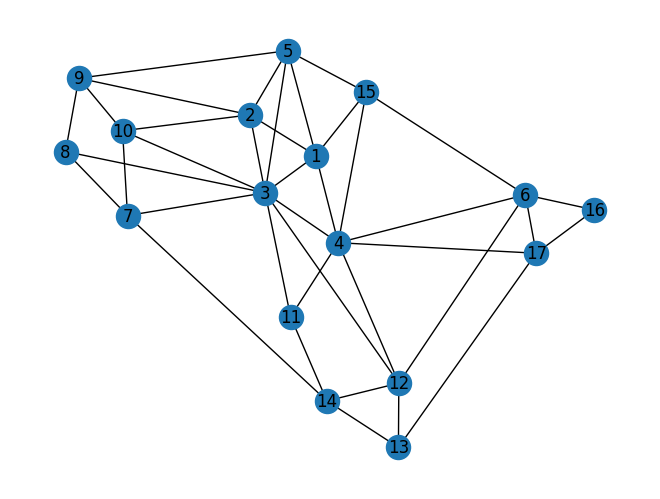

In [67]:
nx.draw(G,with_labels=True)
#nx.draw(G)

In [68]:
#Check edge data
G.edges.data()

EdgeDataView([(1, 2, {'weight': 23}), (1, 3, {'weight': 21}), (1, 4, {'weight': 21}), (1, 15, {'weight': 22}), (1, 5, {'weight': 1}), (2, 3, {'weight': 21}), (2, 9, {'weight': 1}), (2, 10, {'weight': 5}), (2, 5, {'weight': 21}), (3, 4, {'weight': 23}), (3, 5, {'weight': 1}), (3, 8, {'weight': 2}), (3, 10, {'weight': 2}), (3, 11, {'weight': 1}), (3, 12, {'weight': 1}), (3, 7, {'weight': 1}), (4, 6, {'weight': 1}), (4, 11, {'weight': 22}), (4, 12, {'weight': 3}), (4, 17, {'weight': 4}), (4, 15, {'weight': 1}), (15, 5, {'weight': 21}), (15, 6, {'weight': 4}), (9, 5, {'weight': 2}), (9, 8, {'weight': 23}), (9, 10, {'weight': 21}), (10, 7, {'weight': 21}), (8, 7, {'weight': 21}), (11, 14, {'weight': 1}), (12, 6, {'weight': 2}), (12, 13, {'weight': 21}), (12, 14, {'weight': 22}), (6, 16, {'weight': 23}), (6, 17, {'weight': 21}), (17, 13, {'weight': 1}), (17, 16, {'weight': 21}), (7, 14, {'weight': 4}), (14, 13, {'weight': 21})])

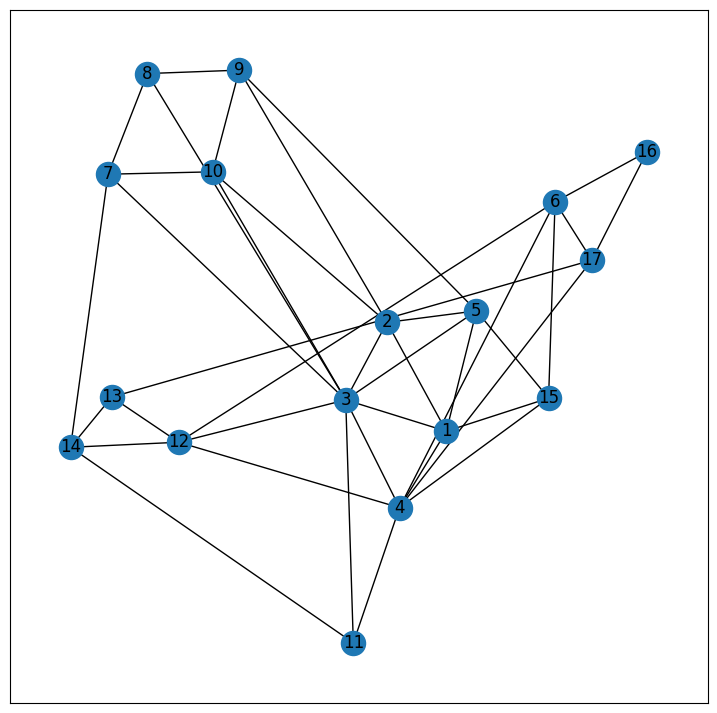

In [69]:
plt.figure(figsize=(9,9))
nx.draw_networkx(G)
plt.show()

## 2/ Network Centrality Measures
### 2.1/ Degree centrality

(array([1., 3., 6., 0., 5., 0., 0., 1., 0., 1.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <BarContainer object of 10 artists>)

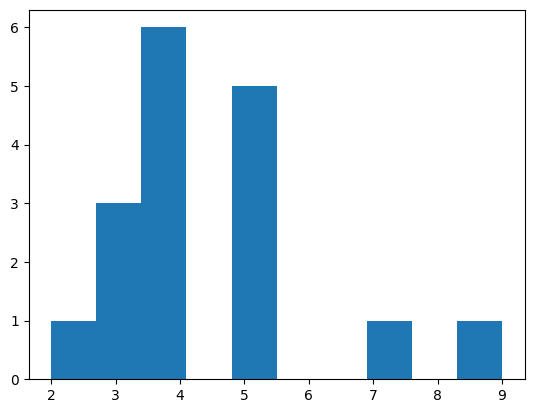

In [70]:
#Degree plot for undirected and weighted graph
degrees = [G.degree(n) for n in G.nodes()]

#degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)

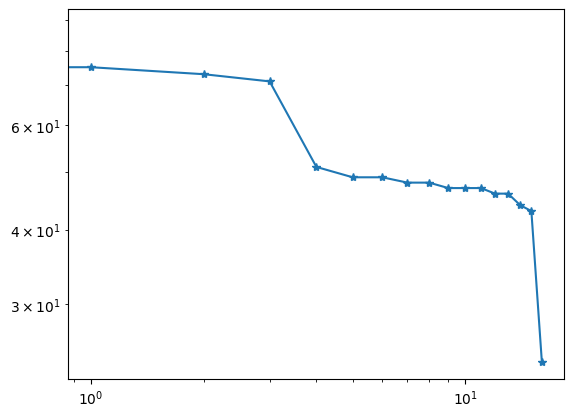

In [71]:
degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [72]:
#Degree centrality for weighted graph
degree = G.degree(weight='weight')
max_degree = max(dict(degree).values())

degree_centrality_weighted = [deg/max_degree for deg in dict(degree).values()]

degree_centrality_weighted

[1.0,
 0.8068181818181818,
 0.8295454545454546,
 0.8522727272727273,
 0.5454545454545454,
 0.5340909090909091,
 0.5568181818181818,
 0.5227272727272727,
 0.5227272727272727,
 0.2727272727272727,
 0.5568181818181818,
 0.5795454545454546,
 0.5340909090909091,
 0.5,
 0.5340909090909091,
 0.5454545454545454,
 0.48863636363636365]

In [73]:
nx.degree_centrality(G)

{1: 0.3125,
 2: 0.3125,
 3: 0.5625,
 4: 0.4375,
 15: 0.25,
 9: 0.25,
 10: 0.25,
 5: 0.3125,
 8: 0.1875,
 11: 0.1875,
 12: 0.3125,
 6: 0.3125,
 17: 0.25,
 16: 0.125,
 7: 0.25,
 14: 0.25,
 13: 0.1875}

### 2.2/ Betweenness centrality

In [132]:
nx.betweenness_centrality(G, weight='weight')

{1: 0.0,
 2: 0.0,
 3: 0.7583333333333333,
 4: 0.325,
 15: 0.0,
 9: 0.11666666666666667,
 10: 0.0,
 5: 0.3333333333333333,
 8: 0.0,
 11: 0.125,
 12: 0.5,
 6: 0.2916666666666667,
 17: 0.125,
 16: 0.0,
 7: 0.0,
 14: 0.0,
 13: 0.0}

In [133]:
#Sort for identifying most inflential nodes using betweenness centrality
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='weight')

for node in sorted(betweenness_centrality_weighted, key=betweenness_centrality_weighted.get, reverse=True):
  print(node, betweenness_centrality_weighted[node])

3 0.7583333333333333
12 0.5
5 0.3333333333333333
4 0.325
6 0.2916666666666667
11 0.125
17 0.125
9 0.11666666666666667
1 0.0
2 0.0
15 0.0
10 0.0
8 0.0
16 0.0
7 0.0
14 0.0
13 0.0


### 2.3/ Closeness centrality

In [74]:
nx.closeness_centrality(G)

{1: 0.5333333333333333,
 2: 0.48484848484848486,
 3: 0.6666666666666666,
 4: 0.6153846153846154,
 15: 0.48484848484848486,
 9: 0.41025641025641024,
 10: 0.47058823529411764,
 5: 0.5161290322580645,
 8: 0.45714285714285713,
 11: 0.5161290322580645,
 12: 0.5714285714285714,
 6: 0.5,
 17: 0.45714285714285713,
 16: 0.35555555555555557,
 7: 0.48484848484848486,
 14: 0.47058823529411764,
 13: 0.43243243243243246}

In [75]:
nx.closeness_centrality(G, distance='weight')

{1: 0.16326530612244897,
 2: 0.13008130081300814,
 3: 0.21621621621621623,
 4: 0.16666666666666666,
 15: 0.14414414414414414,
 9: 0.14678899082568808,
 10: 0.1553398058252427,
 5: 0.1927710843373494,
 8: 0.15384615384615385,
 11: 0.1839080459770115,
 12: 0.2077922077922078,
 6: 0.1839080459770115,
 17: 0.11347517730496454,
 16: 0.03827751196172249,
 7: 0.1797752808988764,
 14: 0.1568627450980392,
 13: 0.10256410256410256}

### 2.4/ Eigenvector Centrality

In [78]:
nx.eigenvector_centrality(G, weight='weight',max_iter = 600)

{1: 0.5243879751840346,
 2: 0.4234266643002833,
 3: 0.4609728287014517,
 4: 0.3941573797305682,
 15: 0.26726633574782693,
 9: 0.06061597013618106,
 10: 0.08439577732499759,
 5: 0.242065790354225,
 8: 0.05344744462526894,
 11: 0.14206001915974797,
 12: 0.04535228494306331,
 6: 0.05556814065819854,
 17: 0.0552431826941605,
 16: 0.03780719548725359,
 7: 0.05384481797483081,
 14: 0.029198742490167552,
 13: 0.025133401245443665}

### 2.5/ Katz Centrality

In [134]:
nx.katz_centrality(G)

{1: 0.26618993626002696,
 2: 0.25852148990193397,
 3: 0.34789011195803876,
 4: 0.30380429431829625,
 15: 0.23327053802129114,
 9: 0.22137718593506467,
 10: 0.23134469376305405,
 5: 0.25869656644292643,
 8: 0.20549255350345041,
 11: 0.21263834616088179,
 12: 0.2565554334351372,
 6: 0.24429808778427545,
 17: 0.21748417879464044,
 16: 0.17214990077487388,
 7: 0.22594164043918732,
 14: 0.21497249250773137,
 13: 0.19487287897431288}

### 2.6/ PageRank Centrality

In [79]:
nx.pagerank(G, weight='weight')

{1: 0.08510275171090052,
 2: 0.07036723548249191,
 3: 0.07210878220106506,
 4: 0.07793068159840727,
 15: 0.05086993441701706,
 9: 0.055565198429846537,
 10: 0.05703894111148803,
 5: 0.04910224124242256,
 8: 0.05483671362647849,
 11: 0.030132480983098633,
 12: 0.05929092165421931,
 6: 0.06038211879945627,
 17: 0.05616702153345073,
 16: 0.05330205121583224,
 7: 0.0558770073826599,
 14: 0.05866910324143484,
 13: 0.05325681536973059}

## 3/  Implement manually centralities in python and comparing with the NetworkX formulars

Input: an adjacency matrix.

Output: 

1. Return a list or vector of centrality values

2. Comparing the manual results with NetworkX

### 3.1/ Creating a Graph:

In [81]:
import numpy as np

A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
              [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])
mat_size = len(A)
print("Size Graph: ", mat_size,":")
print(A)

Size Graph:  9 :
[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]]


### 3.2/ Degree Centrality:

In [82]:
temp = A.copy()


def sum_of_row(graph, a):
    degSum = 0
    for column in range(mat_size):
        degSum += graph[a,column]
    return degSum
        
# Degree Centrality:
def degreeCentrality(a):
    degSum = sum_of_row(temp, a)
    result = (degSum/(mat_size-1))
    
    return result

In [85]:
DCValues = [float(degreeCentrality(a)) for a in range(mat_size)]
print("Degree Centralities of the Graph: \n", DCValues)

Degree Centralities of the Graph: 
 [0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]


#### 3.2.1/ Comparing the Computed values with the Networkx solutions:


In [87]:
H = nx.from_numpy_array(A)
DCValues = [float(degreeCentrality(a)) for a in range(mat_size)]
print("Calculated Degree Centralities: \n", DCValues)
print("\nNetworkX Degree Centralities: \n", nx.degree_centrality(H))

Calculated Degree Centralities: 
 [0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]

NetworkX Degree Centralities: 
 {0: 0.375, 1: 0.25, 2: 0.375, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.375, 8: 0.125}


### 3.3/  Betweenness Centrality

In [121]:
# Using NetworkX only to calculate the shortest path:
import networkx as nx

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_array(temp)

In [122]:
step_mat = np.zeros((mat_size,mat_size))
step_mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [124]:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

pow_size = int(step_mat.max())+1
A_powers = [np.linalg.matrix_power(A,m) for m in range(1,pow_size)]

[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


In [125]:
A_powers
sigma = np.zeros((mat_size,mat_size))
sigma

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [126]:
min_lengths = np.zeros((mat_size,mat_size))
min_lengths

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [127]:
for i in range(mat_size):
    for j in range(mat_size):
        for x in range(pow_size-1):
            X = A_powers[x].copy()
            if X[i,j] > 0 and i != j:
                sigma[i,j] = X[i,j]
                min_lengths[i,j] = x + 1
                break

In [128]:
def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(mat_size)
    B[:,j] = np.zeros(mat_size)
    B_powers = [np.linalg.matrix_power(B,m) for m in [1,2,3,4,5]] ##[1,2,3,4,5]]
    B_sigma = np.zeros((mat_size,mat_size))
    B_min_lengths = np.zeros((mat_size,mat_size))
    for i in range(mat_size):
        for k in range(mat_size):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)

In [129]:
def betweenness_centrality(j):
    # Finally, the betweenness
    sigst = sigma_through_jay(j)
    total = 0
    for i in range(mat_size):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

In [130]:
betweennessCentralityValues = [float(betweenness_centrality(x)) for x in range(mat_size)]
print("Betweenness Centralities of the Graph: \n", betweennessCentralityValues)

Betweenness Centralities of the Graph: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]


#### 3.3.1/ Comparison

In [131]:
betweennessCentralityValues = [float(betweenness_centrality(x)) for x in range(mat_size)]
print("Calculated Betweenness Centralities: \n", betweennessCentralityValues)
print("\nNetworkX Betweenness Centralities: \n", nx.betweenness_centrality(H, normalized=False).values())

Calculated Betweenness Centralities: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]

NetworkX Betweenness Centralities: 
 dict_values([3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0])


### 3.4/ Closeness Centrality:

In [88]:
# calculate the shortest path:
import networkx as nx
import numpy as np

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_array(temp)

# Creating a blank Step Matrix 
step_mat = np.zeros((mat_size,mat_size))
# Calculate between nodes and save it in the step matrix:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

def closenessCentrality(b):
    closeSum = sum_of_row(step_mat, b)
    
    # dividing the (n-1) nodes
    result = ((mat_size-1)/closeSum)
    
    return result

[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


In [91]:
closenessCentralityValues = [float(closenessCentrality(b)) for b in range(mat_size)]
print("Closeness Centralities: \n", closenessCentralityValues)

Closeness Centralities: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]


#### 3.4.1/ Comparing the Computed Closeness Centrality Values  with the Networkx solutions:

In [93]:
closenessCentralityValues = [float(closenessCentrality(b)) for b in range(mat_size)]
print("Calculated Closeness: \n", closenessCentralityValues)
print("\nNetworkX Closeness: \n", nx.closeness_centrality(H))

Calculated Closeness: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]

NetworkX Closeness: 
 {0: 0.47058823529411764, 1: 0.34782608695652173, 2: 0.47058823529411764, 3: 0.6153846153846154, 4: 0.6153846153846154, 5: 0.6153846153846154, 6: 0.5, 7: 0.47058823529411764, 8: 0.34782608695652173}


### 3.5/ Eigenvector Centrality:


In [95]:
# Calculating Eigens of the graph
w,v = np.linalg.eig(temp)
# Index of the Maximum Absolute Eigen Value of the graph
index = (np.abs(max(w, key=abs))).argmax()

# Eigen Vector of the maximum Eigen Value
eigenCentralityValues = [float(v[ecv,index]) for ecv in range(mat_size)]

print("Eigen Vector Centralities of the Graph: \n", eigenCentralityValues)

Eigen Vector Centralities of the Graph: 
 [0.1957487957091835, 0.11168370323986566, 0.19574879570918338, 0.3787480253356783, 0.4680854763104227, 0.46808547631042285, 0.40997938953295365, 0.3840203838411054, 0.11695606174529301]


#### 3.5.1/ Comparison

In [96]:
eigenCentralityValues = [float(v[ecv,index]) for ecv in range(mat_size)]
print("Calculated Eigen Vector Centralities: \n", eigenCentralityValues)
print("\nNetworkX Eigen Vector Centralities: \n", nx.eigenvector_centrality(H))

Calculated Eigen Vector Centralities: 
 [0.1957487957091835, 0.11168370323986566, 0.19574879570918338, 0.3787480253356783, 0.4680854763104227, 0.46808547631042285, 0.40997938953295365, 0.3840203838411054, 0.11695606174529301]

NetworkX Eigen Vector Centralities: 
 {0: 0.19575404149708636, 1: 0.1116880543296416, 2: 0.19575404149708636, 3: 0.3787510773733839, 4: 0.4680839101306905, 5: 0.4680839101306905, 6: 0.40997658806938597, 7: 0.3840179229632457, 8: 0.11695489991950338}


## 3.6/ Katz Centrality

In [108]:
# Converting it to a NetworkX Graph:
G_temp = nx.from_numpy_array(temp)
#nx.draw(temp_Graph)

In [109]:
#default value
alpha = 1
beta = 1
max_iter = 1000
tol = 1e-06
weight = None

nx.katz_centrality(G_temp)

{0: 0.32231142220857734,
 1: 0.2893349955974206,
 2: 0.32231142220857734,
 3: 0.36274091133772884,
 4: 0.367029925075744,
 5: 0.367029925075744,
 6: 0.3577487271446689,
 7: 0.33405349846458715,
 8: 0.26064758272427896}

In [114]:
from math import sqrt
b = dict.fromkeys(G_temp,float(beta))

def Katz(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1.0e-6):
    nnodes = G.number_of_nodes()
    dict_v = dict([(n,0) for n in G])
    b = dict.fromkeys(G,float(beta))
    for i in range(max_iter):
        xlast = dict_v
        dict_v = dict.fromkeys(xlast, 0)
        # y^T = anfa * x^T A - b
        for n in dict_v:
            for nbr in G[n]:
                dict_v[nbr] += xlast[n] * G[n][nbr].get(weight, 1)
        for n in dict_v:
            dict_v[n] = alpha*dict_v[n] + b[n]
        err = sum([abs(dict_v[n]-xlast[n]) for n in dict_v])
        if err < nnodes*tol:
            # normalize 
            s = 1.0/sqrt(sum(v**2 for v in dict_v.values()))
            s= np.round(s,3)
            for n in dict_v:
                dict_v[n] *= s
                dict_v[n] = float(np.round(dict_v[n],3))
            return dict_v
Katz(G_temp)

{0: 0.322,
 1: 0.289,
 2: 0.322,
 3: 0.363,
 4: 0.367,
 5: 0.367,
 6: 0.358,
 7: 0.334,
 8: 0.261}

### 3.6.1/ Comparison:

In [115]:
print("Katz Centralities of the Graph: \n", Katz(G))
print("Katz Centralities NetworkX: \n", nx.katz_centrality(G))

Katz Centralities of the Graph: 
 {1: 0.266, 2: 0.259, 3: 0.348, 4: 0.304, 15: 0.233, 9: 0.221, 10: 0.231, 5: 0.259, 8: 0.206, 11: 0.213, 12: 0.257, 6: 0.244, 17: 0.218, 16: 0.172, 7: 0.226, 14: 0.215, 13: 0.195}
Katz Centralities NetworkX: 
 {1: 0.26618993626002696, 2: 0.25852148990193397, 3: 0.34789011195803876, 4: 0.30380429431829625, 15: 0.23327053802129114, 9: 0.22137718593506467, 10: 0.23134469376305405, 5: 0.25869656644292643, 8: 0.20549255350345041, 11: 0.21263834616088179, 12: 0.2565554334351372, 6: 0.24429808778427545, 17: 0.21748417879464044, 16: 0.17214990077487388, 7: 0.22594164043918732, 14: 0.21497249250773137, 13: 0.19487287897431288}


### 3.7/ Pagerank Centrality

In [116]:
from networkx.algorithms.link_analysis.pagerank_alg import pagerank

pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)


{1: 0.08510275171090052,
 2: 0.07036723548249191,
 3: 0.07210878220106506,
 4: 0.07793068159840727,
 15: 0.05086993441701706,
 9: 0.055565198429846537,
 10: 0.05703894111148803,
 5: 0.04910224124242256,
 8: 0.05483671362647849,
 11: 0.030132480983098633,
 12: 0.05929092165421931,
 6: 0.06038211879945627,
 17: 0.05616702153345073,
 16: 0.05330205121583224,
 7: 0.0558770073826599,
 14: 0.05866910324143484,
 13: 0.05325681536973059}

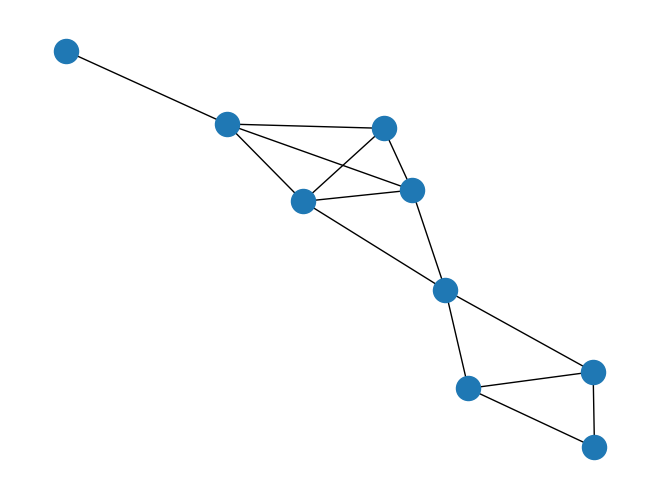

In [117]:
# Converting it to a NetworkX Graph:
G_temp = nx.from_numpy_array(temp)
nx.draw(temp_Graph)

In [118]:
import numpy as np
import scipy as sp
import scipy.sparse 

def mypagerank(G,alpha=0.85, max_iter=100,tol=1.0e-6):
    
    N = len(G)
    nodelist = list(G)
    A = nx.to_scipy_sparse_array(G, nodelist=nodelist, dtype=float)
    S = A.sum(axis=1)
    S[S != 0] = 1.0 / S[S != 0]
    Q = sp.sparse.csr_array(sp.sparse.spdiags(S.T, 0, *A.shape))
    A = Q @ A
    # initial vector
    x = np.repeat(1.0 / N, N)
    p = np.repeat(1.0 / N, N)
    
    dangling_weights = p
    is_dangling = np.where(S == 0)[0]
    for _ in range(max_iter):
        xlast = x
        x = alpha * (x @ A + sum(x[is_dangling]) * dangling_weights) + (1 - alpha) * p
        #l1 norm
        err = np.absolute(x - xlast).sum()
        if err < N * tol:
            return dict(zip(nodelist, map(float, np.round(x,4))))

In [119]:
mypagerank(G)

{1: 0.0851,
 2: 0.0704,
 3: 0.0721,
 4: 0.0779,
 15: 0.0509,
 9: 0.0556,
 10: 0.057,
 5: 0.0491,
 8: 0.0548,
 11: 0.0301,
 12: 0.0593,
 6: 0.0604,
 17: 0.0562,
 16: 0.0533,
 7: 0.0559,
 14: 0.0587,
 13: 0.0533}

#### 3.7.1/ Comparison

In [120]:
print("pagerank Centralities of the Graph: \n",mypagerank(G))
print("pagerank Centralities NetworkX: \n", nx.pagerank(G, weight='weight'))

pagerank Centralities of the Graph: 
 {1: 0.0851, 2: 0.0704, 3: 0.0721, 4: 0.0779, 15: 0.0509, 9: 0.0556, 10: 0.057, 5: 0.0491, 8: 0.0548, 11: 0.0301, 12: 0.0593, 6: 0.0604, 17: 0.0562, 16: 0.0533, 7: 0.0559, 14: 0.0587, 13: 0.0533}
pagerank Centralities NetworkX: 
 {1: 0.08510275171090052, 2: 0.07036723548249191, 3: 0.07210878220106506, 4: 0.07793068159840727, 15: 0.05086993441701706, 9: 0.055565198429846537, 10: 0.05703894111148803, 5: 0.04910224124242256, 8: 0.05483671362647849, 11: 0.030132480983098633, 12: 0.05929092165421931, 6: 0.06038211879945627, 17: 0.05616702153345073, 16: 0.05330205121583224, 7: 0.0558770073826599, 14: 0.05866910324143484, 13: 0.05325681536973059}
